# ASSIGNMENT 3: CMTH 642 DATA ANALYTICS: ADVANCED METHODS


## Fatemeh Kamyabkalantari
## Studen Number:501087713


## Preparation:
The dataset is related to white Portuguese "Vinho Verde" wine. For more info:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality
Import the following file:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequ
ality-white.csv

In [147]:
#pip install --upgrade pingouin
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


### 1. Check the datatypes of the attributes. (3 points)

In [148]:

dataset = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
df = pd.DataFrame(dataset)

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [149]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [150]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### 2. Are there any missing values in the dataset? (4 points)

In [151]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### There is not any missing value.

### 3.What is the correlation between the attributes other than Quality? (10 points)

In [152]:
# First we can drope the quality
df_nquality= df.drop(['quality'], axis='columns')


df_nquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
dtypes: float64(11)
memory usage: 421.0 KB


In [153]:
# Calculate the pairwise pearson correlation
corr = pg.pairwise_corr(df_nquality, method='pearson')
# Sort the correlation by p-values and display the first rows
corr.sort_values(by=['p-unc'])[['X', 'Y', 'n', 'r', 'p-unc']].head()

,X,Y,n,r,p-unc
30,residual sugar,density,4898,0.838966,0.000000e+00
45,total sulfur dioxide,density,4898,0.529881,0.000000e+00
51,density,alcohol,4898,-0.780138,0.000000e+00
40,free sulfur dioxide,total sulfur dioxide,4898,0.615501,0.000000e+00
33,residual sugar,alcohol,4898,-0.450631,1.206209e-243


In [154]:
df_nquality.corr().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12
volatile acidity,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,0.03,-0.03,-0.04,0.07
citric acid,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08
residual sugar,0.09,0.06,0.09,1.00,0.09,0.30,0.40,0.84,-0.19,-0.03,-0.45
chlorides,0.02,0.07,0.11,0.09,1.00,0.10,0.20,0.26,-0.09,0.02,-0.36
free sulfur dioxide,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,0.29,-0.00,0.06,-0.25
total sulfur dioxide,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.53,0.00,0.13,-0.45
density,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1.00,-0.09,0.07,-0.78
pH,-0.43,-0.03,-0.16,-0.19,-0.09,-0.00,0.00,-0.09,1.00,0.16,0.12
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1.00,-0.02


Text(0.5, 1.0, 'Correlation matrix')

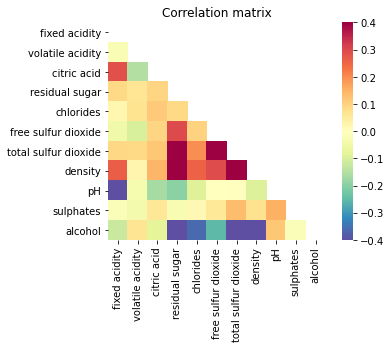

In [155]:
corrs = df_nquality.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

### 4. Graph the frequency distribution of wine quality by using Quality. (10 points)

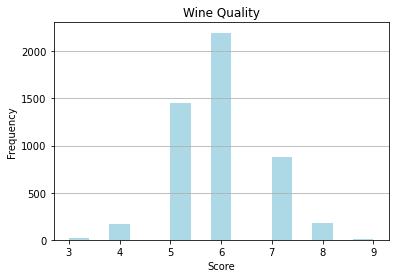

In [156]:
df['quality'].plot.hist(grid=True, bins=15, 
                   color='LightBlue')
plt.title('Wine Quality')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(axis='x', alpha=0.75)

### 5. Reduce the levels of rating for quality to three levels as high, medium andlow. Assign the levels of 3 and 4 to level 0; 5 and 6 to level 1; and 7,8 and 9to level 2. (10 points)

In [157]:
df['quality_label'] = df.quality.apply(lambda q: 'Low' if q <= 4 else 'Medium' if q <= 6 else 'High')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Medium


In [158]:
# We do not need the quality anymore so we can remove it .
df= df.drop(['quality'], axis='columns')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium


In [159]:
df.quality_label.value_counts()

Medium    3655
High      1060
Low        183
Name: quality_label, dtype: int64

### It seems that the dataset is not imblance. There are some approch to solve this issue for example Undersampling using Tomek and Oversampling using SMOTE. But, it was not asked in the question so I did not take this step into consideration .

### 6. Normalize the numeric attributes. (12 points)

In [160]:
#Normalizing numeric data
def normalize(x):
  return ((x - min(x)) / (max(x) - min(x))) 

In [161]:
X = list(set(list(df)) - set(['quality_label']))
X

['residual sugar',
 'density',
 'volatile acidity',
 'alcohol',
 'total sulfur dioxide',
 'free sulfur dioxide',
 'sulphates',
 'chlorides',
 'pH',
 'fixed acidity',
 'citric acid']

In [162]:
df_n = df.iloc[:,].copy()
df_n[X] = df_n[X].apply(normalize)
df_n.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,Medium
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,Medium
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,Medium
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,Medium
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,Medium


In [163]:
df_n.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7. Divide the dataset to training and test sets. (12 points)

In [164]:

df_train, df_test, y_train, y_test = train_test_split(df_n[X], df_n['quality_label'], test_size=0.35, random_state=0)

In [165]:
df_train.head()


,residual sugar,density,volatile acidity,alcohol,total sulfur dioxide,free sulfur dioxide,sulphates,chlorides,pH,fixed acidity,citric acid
4526,0.185583,0.144399,0.186275,0.693548,0.457077,0.139373,0.186047,0.145401,0.545455,0.192308,0.132530
290,0.208589,0.208020,0.147059,0.161290,0.424594,0.163763,0.302326,0.145401,0.236364,0.326923,0.234940
3597,0.171779,0.150569,0.107843,0.451613,0.296984,0.181185,0.174419,0.097923,0.418182,0.269231,0.168675
729,0.003067,0.101986,0.245098,0.225806,0.415313,0.034843,0.465116,0.522255,0.363636,0.211538,0.162651
4082,0.122699,0.139001,0.147059,0.419355,0.308585,0.121951,0.360465,0.109792,0.463636,0.201923,0.168675


In [166]:
df_n['quality_label'].head()

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: quality_label, dtype: object

In [167]:
y_train.head()

4526    Medium
290       High
3597    Medium
729     Medium
4082    Medium
Name: quality_label, dtype: object

In [168]:
df_test.head()

,residual sugar,density,volatile acidity,alcohol,total sulfur dioxide,free sulfur dioxide,sulphates,chlorides,pH,fixed acidity,citric acid
2762,0.012270,0.102757,0.235294,0.435484,0.357309,0.020906,0.232558,0.121662,0.472727,0.336538,0.210843
42,0.104294,0.159823,0.225490,0.290323,0.350348,0.090592,0.279070,0.178042,0.372727,0.307692,0.156627
1419,0.015337,0.086563,0.058824,0.451613,0.218097,0.087108,0.209302,0.091988,0.318182,0.365385,0.445783
3664,0.078221,0.051089,0.205882,0.790323,0.338747,0.181185,0.139535,0.077151,0.500000,0.115385,0.325301
2125,0.177147,0.165606,0.196078,0.338710,0.357309,0.139373,0.279070,0.115727,0.436364,0.211538,0.132530


In [169]:
y_test.head()

2762    Medium
42      Medium
1419      High
3664      High
2125    Medium
Name: quality_label, dtype: object

### 9.Use the KNN algorithm to predict the quality of wine using its attributes.(12 points)

In [170]:

KNC = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 12, n_neighbors = 12, p  = 1, weights = 'distance') 
KNC.fit(df_train[X], y_train) 


KNeighborsClassifier(algorithm='ball_tree', leaf_size=12, n_neighbors=12, p=1,
                     weights='distance')

In [171]:
print('KNeighbors Classifier Training Accuracy: {:2.2%}'.format(accuracy_score(y_train, KNC.predict(df_train))))

KNeighbors Classifier Training Accuracy: 100.00%


In [172]:
y_pred = KNC.predict(df_test)  
y_pred



array(['Medium', 'Medium', 'Medium', ..., 'High', 'Medium', 'Medium'],
      dtype=object)

In [173]:
print('KNeighbors Classifier Test Accuracy: {:2.2%}'.format(accuracy_score(y_test, y_pred)))

KNeighbors Classifier Test Accuracy: 81.63%


### 10.Display the confusion matrix to evaluate the model performance. (12 points)

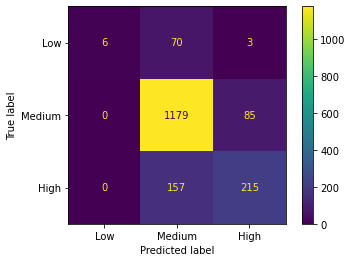

In [78]:
plot_confusion_matrix(KNC, df_test, y_test, labels=['Low','Medium','High'])  

In [179]:
matrix = confusion_matrix(y_test,y_pred, labels=['Low','Medium','High'])
print('Classification report : \n',matrix)

Classification report : 
 [[   6   70    3]
 [   0 1179   85]
 [   0  157  215]]


In [180]:
# classification report for precision, recall f1-score and accuracy
matrix_report = classification_report(y_test,y_pred, labels=['Low','Medium','High'])
print('Classification report : \n',matrix_report)

Classification report : 
               precision    recall  f1-score   support

         Low       1.00      0.08      0.14        79
      Medium       0.84      0.93      0.88      1264
        High       0.71      0.58      0.64       372

    accuracy                           0.82      1715
   macro avg       0.85      0.53      0.55      1715
weighted avg       0.82      0.82      0.80      1715



We can see one Accuracy(0.82)as a whole, but Sensitivity(recall) and Precision for each group, at the above report.Also, the Specificity for each group is shown as the following.

In [181]:
low_Specificity =(matrix[1,1]+matrix[1,2]+matrix[2,1]+matrix[2,2]) /(matrix[1,1]+matrix[1,2]+matrix[2,1]+matrix[2,2]+matrix[1,0]+matrix[2,0])
print('Low_Specificity : ', low_Specificity )


Low_Specificity :  1.0


In [182]:
Medium_Specificity =(matrix[0,0]+matrix[0,2]+matrix[2,0]+matrix[2,2]) /(matrix[0,0]+matrix[0,2]+matrix[2,0]+matrix[2,2]+matrix[0,1]+matrix[2,1])
print('Medium_Specificity : ',round(Medium_Specificity,3) )

Medium_Specificity :  0.497


In [183]:
High_Specificity =(matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1]) /(matrix[0,0]+matrix[0,1]+matrix[1,0]+matrix[1,1]+matrix[0,2]+matrix[1,2])
print('High_Specificity : ',round(High_Specificity,3) )

High_Specificity :  0.934
